In [49]:
import numpy as np
from numpy import array
from numpy import hstack
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dropout

In [50]:
df = pd.read_csv("..\dataset\\psw.csv")

In [51]:
df

,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,42.0,62.6,2023-12-31:16,5.0,26.7,15.3,10.00,12.0,2023-12-31T23:00:00,2023-12-31T16:00:00,1704038400
1,42.0,61.3,2023-12-31:15,5.0,28.0,15.0,10.00,14.0,2023-12-31T22:00:00,2023-12-31T15:00:00,1704034800
2,39.0,57.2,2023-12-31:14,4.7,30.7,14.3,9.33,13.0,2023-12-31T21:00:00,2023-12-31T14:00:00,1704031200
3,36.0,53.1,2023-12-31:13,4.3,33.3,13.7,8.67,12.0,2023-12-31T20:00:00,2023-12-31T13:00:00,1704027600
4,33.0,49.0,2023-12-31:12,4.0,36.0,13.0,8.00,11.0,2023-12-31T19:00:00,2023-12-31T12:00:00,1704024000
...,...,...,...,...,...,...,...,...,...,...,...
17227,153.0,206.6,2022-01-12:21,30.0,7.0,78.0,55.00,47.0,2022-01-13T04:00:00,2022-01-12T21:00:00,1642021200
17228,150.0,203.9,2022-01-12:20,30.7,7.7,78.7,55.67,53.0,2022-01-13T03:00:00,2022-01-12T20:00:00,1642017600
17229,151.0,201.1,2022-01-12:19,31.3,8.3,79.3,56.33,59.0,2022-01-13T02:00:00,2022-01-12T19:00:00,1642014000
17230,152.0,198.4,2022-01-12:18,32.0,9.0,80.0,57.00,65.0,2022-01-13T01:00:00,2022-01-12T18:00:00,1642010400


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aqi              17158 non-null  float64
 1   co               17158 non-null  float64
 2   datetime         17232 non-null  object 
 3   no2              17158 non-null  float64
 4   o3               17158 non-null  float64
 5   pm10             17158 non-null  float64
 6   pm25             17158 non-null  float64
 7   so2              17158 non-null  float64
 8   timestamp_local  17232 non-null  object 
 9   timestamp_utc    17232 non-null  object 
 10  ts               17232 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 1.4+ MB


In [53]:
df = df.drop(["datetime",'timestamp_utc','ts',], axis=1)

In [54]:
df

,aqi,co,no2,o3,pm10,pm25,so2,timestamp_local
0,42.0,62.6,5.0,26.7,15.3,10.00,12.0,2023-12-31T23:00:00
1,42.0,61.3,5.0,28.0,15.0,10.00,14.0,2023-12-31T22:00:00
2,39.0,57.2,4.7,30.7,14.3,9.33,13.0,2023-12-31T21:00:00
3,36.0,53.1,4.3,33.3,13.7,8.67,12.0,2023-12-31T20:00:00
4,33.0,49.0,4.0,36.0,13.0,8.00,11.0,2023-12-31T19:00:00
...,...,...,...,...,...,...,...,...
17227,153.0,206.6,30.0,7.0,78.0,55.00,47.0,2022-01-13T04:00:00
17228,150.0,203.9,30.7,7.7,78.7,55.67,53.0,2022-01-13T03:00:00
17229,151.0,201.1,31.3,8.3,79.3,56.33,59.0,2022-01-13T02:00:00
17230,152.0,198.4,32.0,9.0,80.0,57.00,65.0,2022-01-13T01:00:00


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aqi              17158 non-null  float64
 1   co               17158 non-null  float64
 2   no2              17158 non-null  float64
 3   o3               17158 non-null  float64
 4   pm10             17158 non-null  float64
 5   pm25             17158 non-null  float64
 6   so2              17158 non-null  float64
 7   timestamp_local  17232 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


# set index

In [56]:
# Konversi kolom timestamp_local ke tipe data timestamp_local
df['timestamp_local'] = pd.to_datetime(df['timestamp_local'])

# Pisahkan kolom timestamp_local menjadi jam, tanggal, bulan, dan tahun
df['jam'] = df['timestamp_local'].dt.hour
df['tanggal'] = df['timestamp_local'].dt.day
df['bulan'] = df['timestamp_local'].dt.month
df['tahun'] = df['timestamp_local'].dt.year

In [57]:
df.set_index('timestamp_local', inplace=True)

In [58]:
df

,aqi,co,no2,o3,pm10,pm25,so2,jam,tanggal,bulan,tahun
timestamp_local,,,,,,,,,,,
2023-12-31 23:00:00,42.0,62.6,5.0,26.7,15.3,10.00,12.0,23,31,12,2023
2023-12-31 22:00:00,42.0,61.3,5.0,28.0,15.0,10.00,14.0,22,31,12,2023
2023-12-31 21:00:00,39.0,57.2,4.7,30.7,14.3,9.33,13.0,21,31,12,2023
2023-12-31 20:00:00,36.0,53.1,4.3,33.3,13.7,8.67,12.0,20,31,12,2023
2023-12-31 19:00:00,33.0,49.0,4.0,36.0,13.0,8.00,11.0,19,31,12,2023
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-13 04:00:00,153.0,206.6,30.0,7.0,78.0,55.00,47.0,4,13,1,2022
2022-01-13 03:00:00,150.0,203.9,30.7,7.7,78.7,55.67,53.0,3,13,1,2022
2022-01-13 02:00:00,151.0,201.1,31.3,8.3,79.3,56.33,59.0,2,13,1,2022


# EDA

Text(0, 0.5, 'AQI')

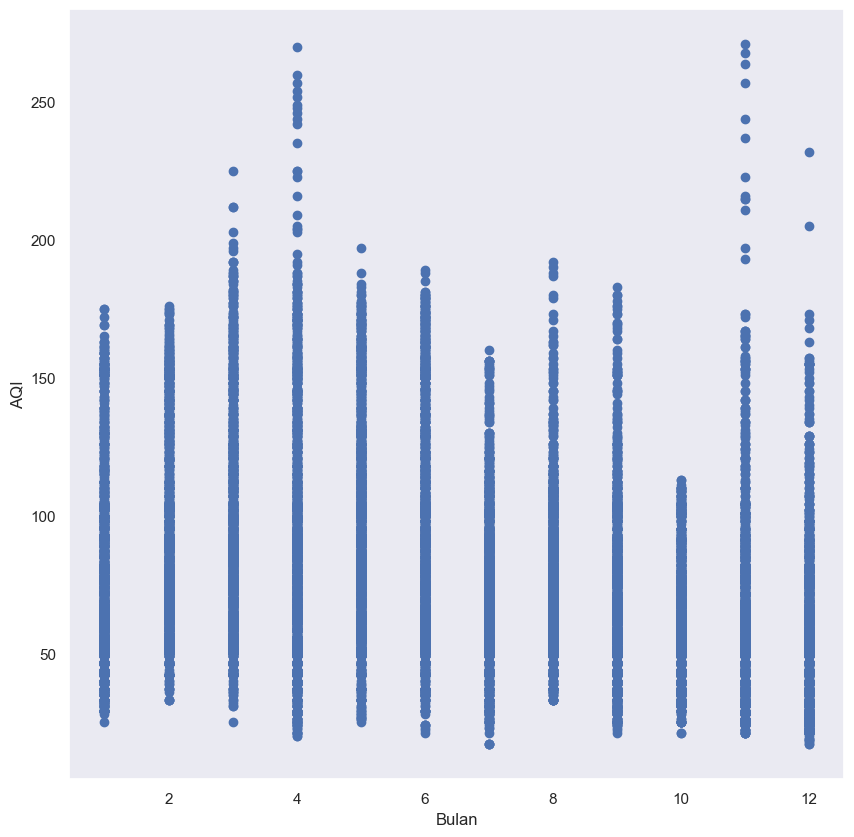

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(x='bulan', y='aqi', data=df)
plt.xlabel('Bulan')
plt.ylabel('AQI')

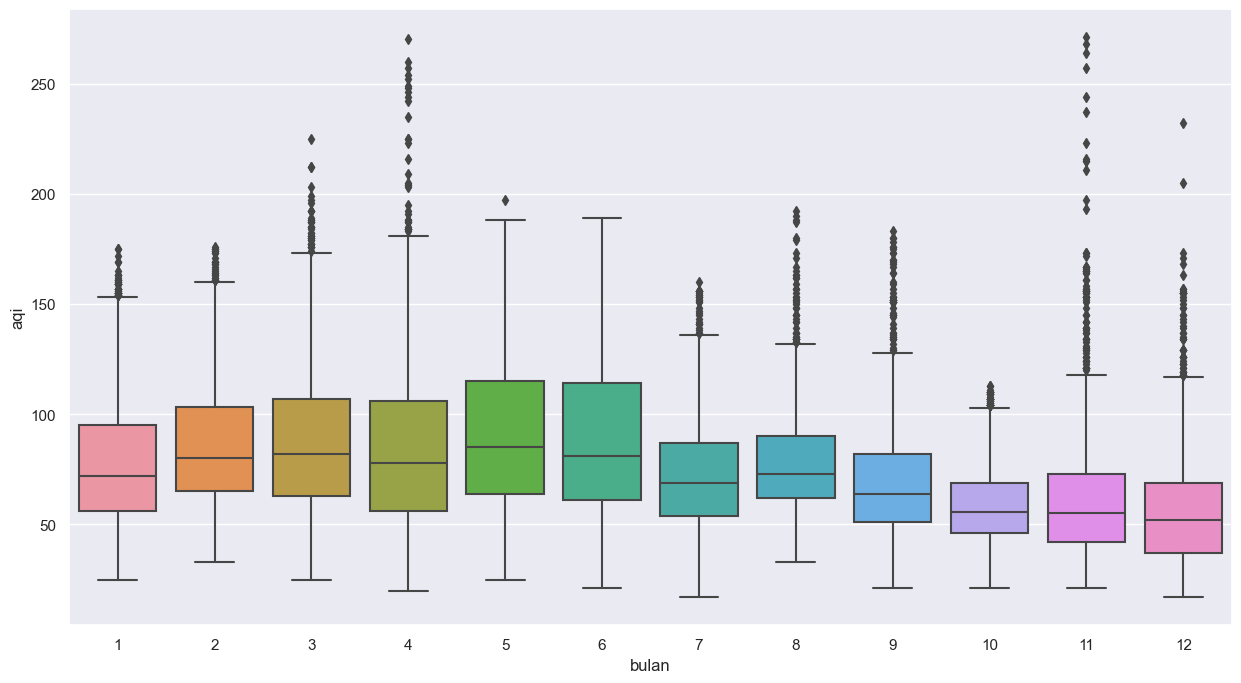

In [60]:
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize': (15,8)})
ax = sns.boxplot(x='bulan', y="aqi", data=df)

Text(0, 0.5, 'AQI')

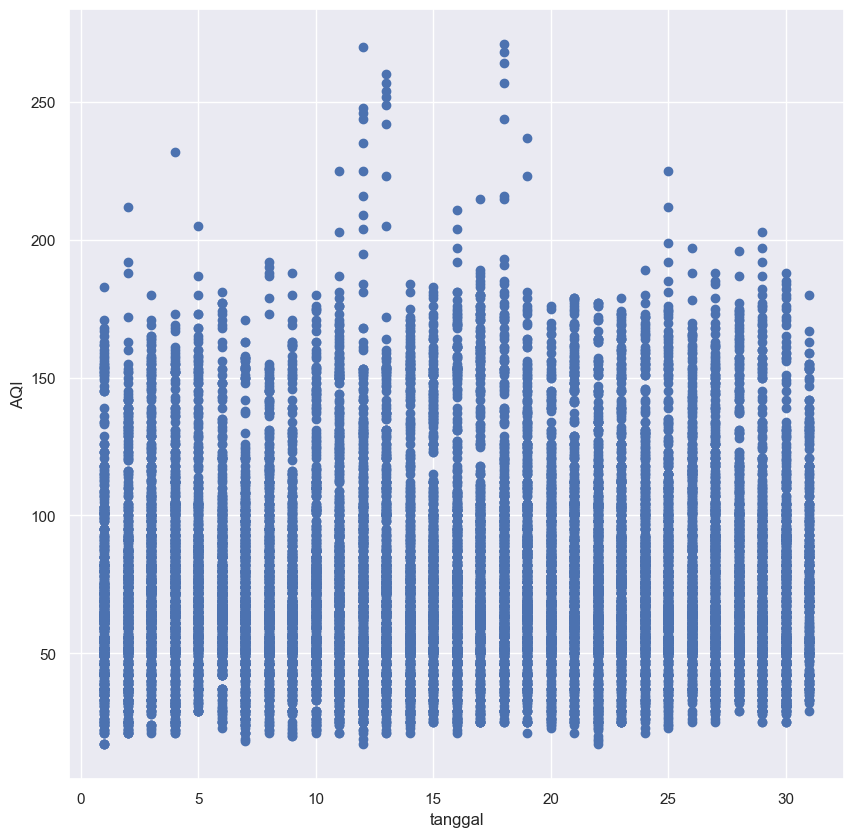

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(x='tanggal', y='aqi', data=df)
plt.xlabel('tanggal')
plt.ylabel('AQI')

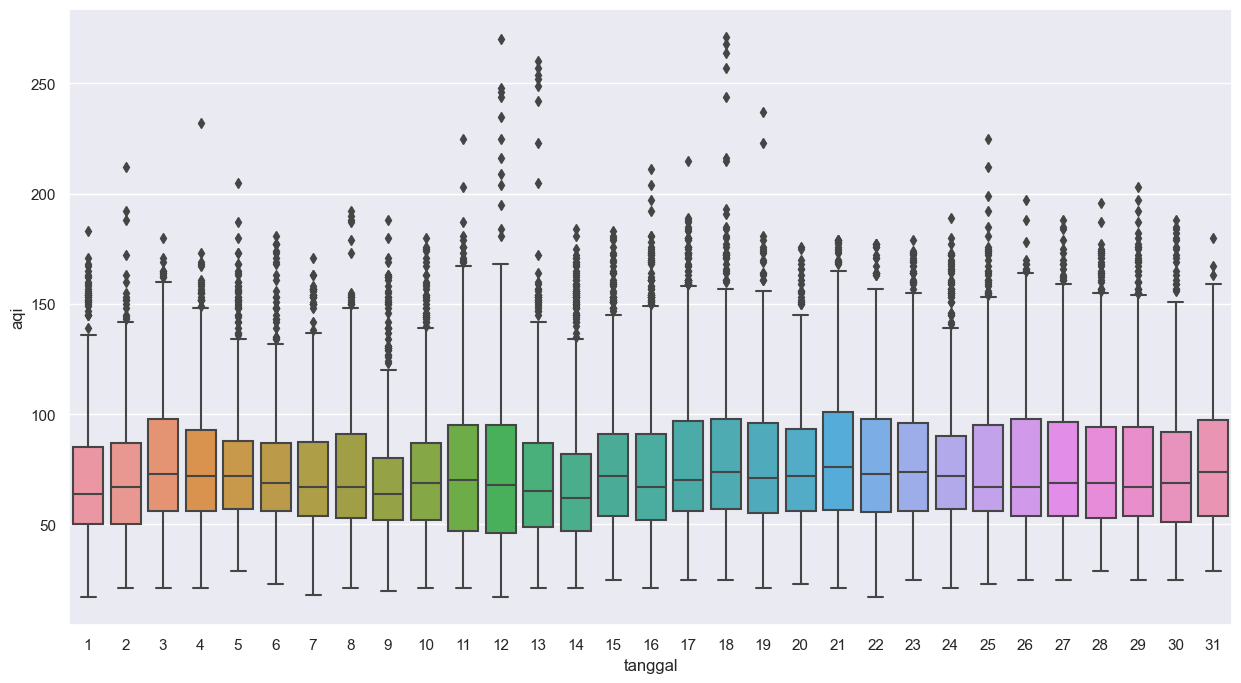

In [62]:
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize': (15,8)})
ax = sns.boxplot(x='tanggal', y="aqi", data=df)

Text(0, 0.5, 'AQI')

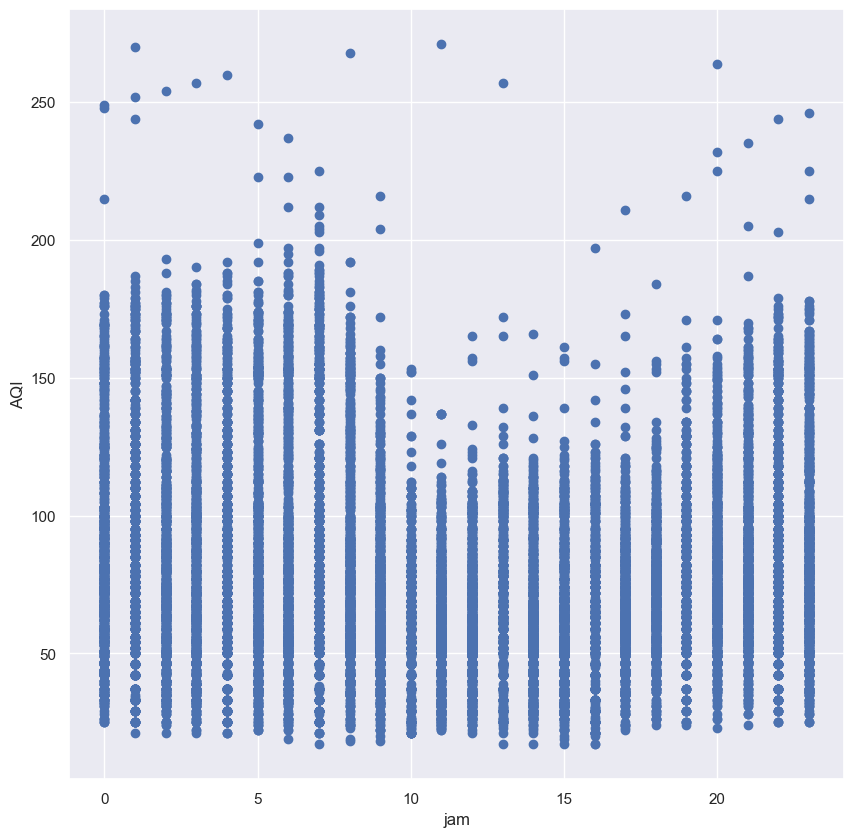

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(x='jam', y='aqi', data=df)
plt.xlabel('jam')
plt.ylabel('AQI')

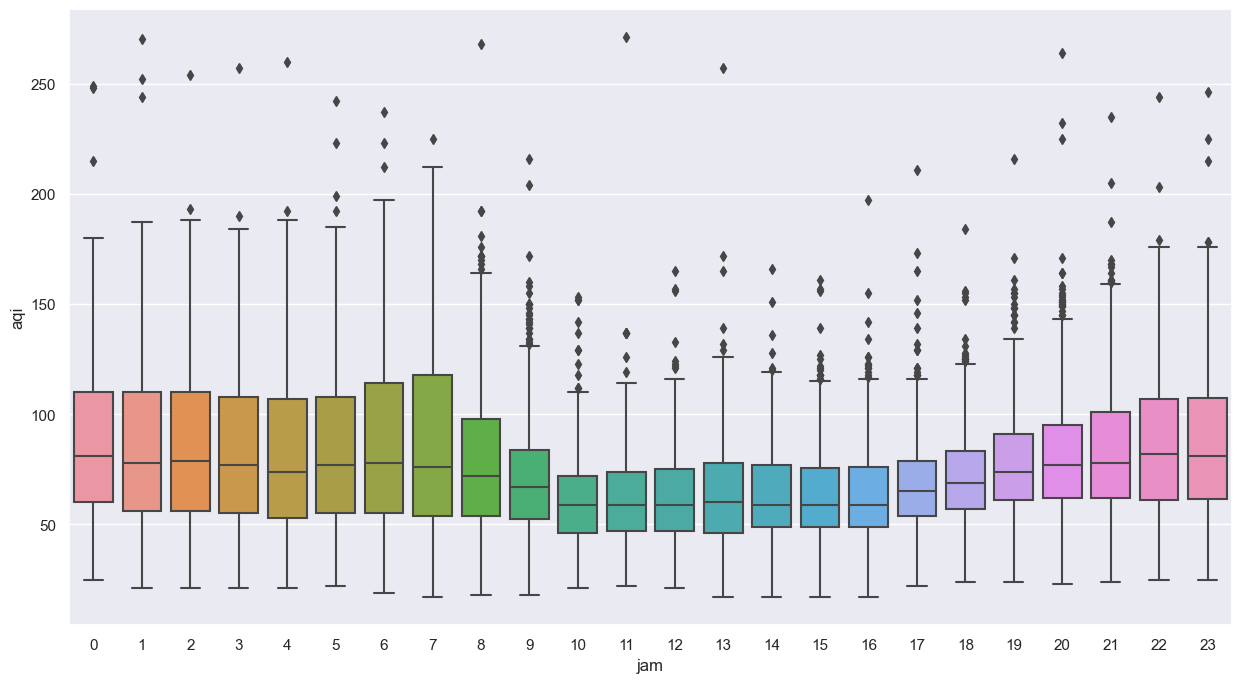

In [64]:
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize': (15,8)})
ax = sns.boxplot(x='jam', y="aqi", data=df)

# Correlation

<Axes: >

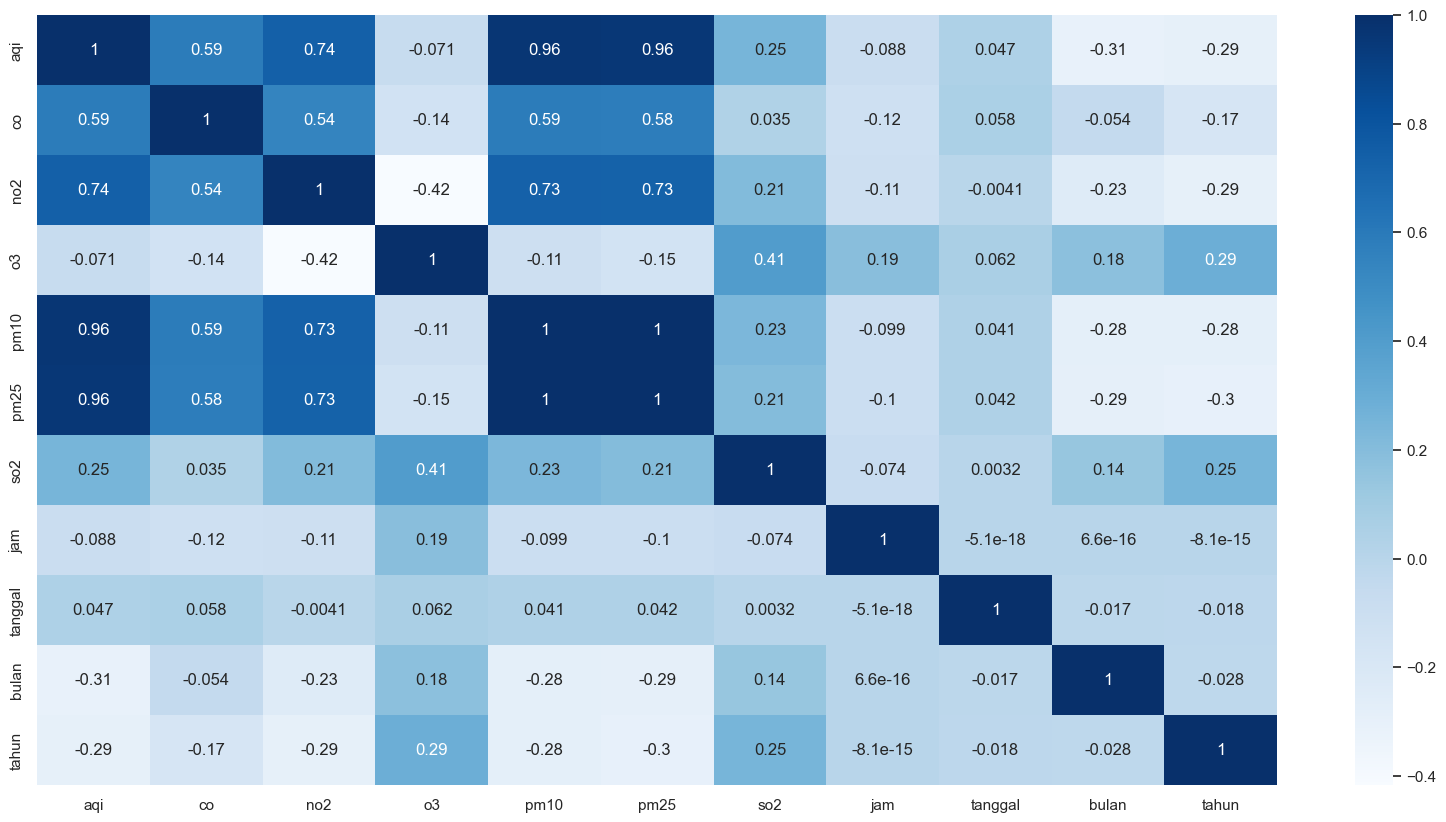

In [65]:
# Correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap="Blues")

# Handling missing value

In [66]:
df_input = df.drop(["jam",'tanggal','bulan','tahun'], axis=1)

In [67]:
df_input

,aqi,co,no2,o3,pm10,pm25,so2
timestamp_local,,,,,,,
2023-12-31 23:00:00,42.0,62.6,5.0,26.7,15.3,10.00,12.0
2023-12-31 22:00:00,42.0,61.3,5.0,28.0,15.0,10.00,14.0
2023-12-31 21:00:00,39.0,57.2,4.7,30.7,14.3,9.33,13.0
2023-12-31 20:00:00,36.0,53.1,4.3,33.3,13.7,8.67,12.0
2023-12-31 19:00:00,33.0,49.0,4.0,36.0,13.0,8.00,11.0
...,...,...,...,...,...,...,...
2022-01-13 04:00:00,153.0,206.6,30.0,7.0,78.0,55.00,47.0
2022-01-13 03:00:00,150.0,203.9,30.7,7.7,78.7,55.67,53.0
2022-01-13 02:00:00,151.0,201.1,31.3,8.3,79.3,56.33,59.0


<Axes: ylabel='timestamp_local'>

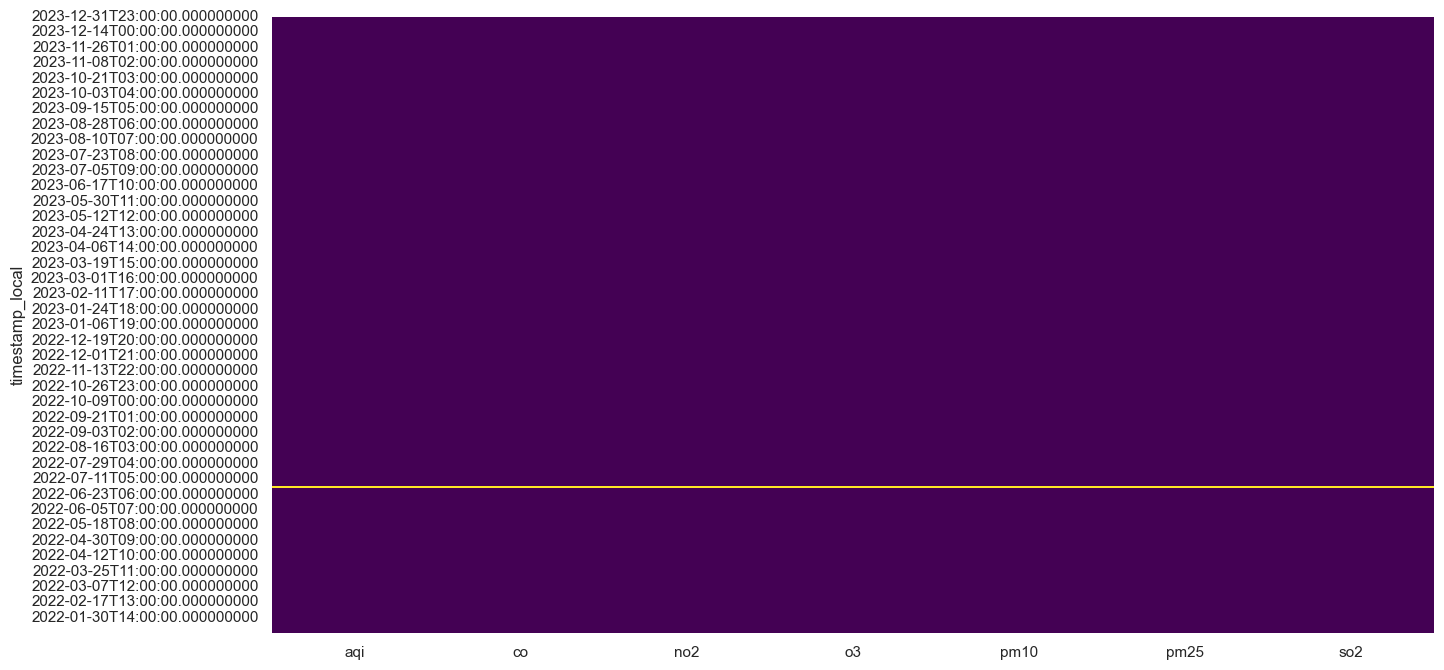

In [68]:
sns.heatmap(df_input.isnull(), cbar=False, cmap='viridis')

In [69]:
df_input.dropna(inplace=True)

In [70]:
print(df_input.isnull().sum())
print("shape: ", df_input.shape)

aqi     0
co      0
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64
shape:  (17158, 7)


In [71]:
df_input.describe()

,aqi,co,no2,o3,pm10,pm25,so2
count,17158.000000,17158.000000,17158.000000,17158.000000,17158.000000,17158.000000,17158.000000
mean,76.591969,117.615829,7.818295,55.241654,35.578844,24.366005,22.090628
std,33.776591,78.295147,7.328209,38.791121,21.678760,15.654591,30.352030
min,17.000000,25.700000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,54.000000,72.400000,2.300000,27.300000,20.300000,13.670000,1.000000
50%,69.000000,100.000000,5.700000,46.300000,30.700000,20.670000,7.700000
75%,93.000000,143.000000,10.700000,72.000000,44.700000,30.330000,33.000000
max,271.000000,1463.400000,66.000000,300.000000,298.000000,209.000000,189.000000


# Preparation data

In [72]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        if out_end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix: out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


In [73]:
total_dataset =  len(df_input)
df_train = df_input[: int(total_dataset*0.87)]
df_test = df_input[int(total_dataset*0.87): total_dataset]

scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.fit_transform(df_test)

print("Data train: ", df_train.shape)
print("Total day for train: ", df_train.shape[0]/24)
print("Data test: ", df_test.shape)
print("Total day for test: ", df_test.shape[0]/24)



Data train:  (14927, 7)
Total day for train:  621.9583333333334
Data test:  (2231, 7)
Total day for test:  92.95833333333333


In [74]:
n_steps_in, n_steps_out =  6, 3

x_train, y_train = split_sequences(df_train_scaled, n_steps_in, n_steps_out)
x_test, y_test = split_sequences(df_test_scaled, n_steps_in, n_steps_out)

n_features = x_train.shape[2]

In [75]:
print("Data input struktur untuk Training: ")
print(x_train[0])

print("Data output struktur untuk validasi: ")
print(y_train[0])


Data input struktur untuk Training: 
[[0.0984252  0.02566599 0.07575758 0.089      0.06965416 0.06060606
  0.06349206]
 [0.0984252  0.02476177 0.07575758 0.09333333 0.06819289 0.06060606
  0.07407407]
 [0.08661417 0.02191    0.07121212 0.10233333 0.06478324 0.05654545
  0.06878307]
 [0.07480315 0.01905822 0.06515152 0.111      0.06186069 0.05254545
  0.06349206]
 [0.06299213 0.01620644 0.06060606 0.12       0.05845105 0.04848485
  0.05820106]
 [0.20472441 0.01620644 0.04545455 0.14333333 0.12323429 0.12727273
  0.05661376]]
Data output struktur untuk validasi: 
[[0.20472441 0.01620644 0.03030303 0.16666667 0.12323429 0.12727273
  0.05449735]
 [0.18897638 0.01620644 0.01515152 0.19       0.11105699 0.11515152
  0.05291005]
 [0.17716535 0.02163177 0.01515152 0.23433333 0.10618607 0.1050303
  0.06349206]]


In [76]:
print("Total Fitur: ", n_features)
print("Total Train data: ", x_train.shape)
print("Total Validation Train data: ", y_train.shape)
print("Total Test data: ", x_test.shape)
print("Total Validation Test data: ", y_test.shape)

Total Fitur:  7
Total Train data:  (14919, 6, 7)
Total Validation Train data:  (14919, 3, 7)
Total Test data:  (2223, 6, 7)
Total Validation Test data:  (2223, 3, 7)


# Modelling

In [77]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))


In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 200)               166400    
                                                                 
 repeat_vector_1 (RepeatVec  (None, 3, 200)            0         
 tor)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 3, 200)            320800    
                                                                 
 time_distributed_1 (TimeDi  (None, 3, 7)              1407      
 stributed)                                                      
                                                                 
Total params: 488607 (1.86 MB)
Trainable params: 488607 (1.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
# Fit model
epoch = 50

model.compile(optimizer='adam', loss='mse', 
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))


Epoch 1/50
467/467 [==============================] - 21s 23ms/step - loss: 0.0048 - mean_absolute_error: 0.0431 - val_loss: 0.0083 - val_mean_absolute_error: 0.0646
Epoch 2/50
467/467 [==============================] - 10s 21ms/step - loss: 0.0020 - mean_absolute_error: 0.0274 - val_loss: 0.0059 - val_mean_absolute_error: 0.0521
Epoch 3/50
467/467 [==============================] - 10s 21ms/step - loss: 0.0016 - mean_absolute_error: 0.0239 - val_loss: 0.0048 - val_mean_absolute_error: 0.0475
Epoch 4/50
467/467 [==============================] - 10s 21ms/step - loss: 0.0014 - mean_absolute_error: 0.0222 - val_loss: 0.0043 - val_mean_absolute_error: 0.0453
Epoch 5/50
467/467 [==============================] - 10s 21ms/step - loss: 0.0013 - mean_absolute_error: 0.0211 - val_loss: 0.0043 - val_mean_absolute_error: 0.0443
Epoch 6/50
467/467 [==============================] - 9s 20ms/step - loss: 0.0012 - mean_absolute_error: 0.0204 - val_loss: 0.0046 - val_mean_absolute_error: 0.0465
Epoch

# Test Model

In [80]:
predictions = model.predict_generator(x_test)
print(predictions.shape)
print(y_test.shape)

C:\Users\62877\AppData\Local\Temp\ipykernel_7748\1237770610.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(x_test)


(2223, 3, 7)
(2223, 3, 7)


In [81]:
predictions = np.reshape(predictions, (2223*3, 7))
real = np.reshape(y_test, (2223*3, 7))

predictions = pd.DataFrame(predictions)
predictions = scaler.inverse_transform(predictions)
predictions = pd.DataFrame(predictions)

real = pd.DataFrame(real)
real = scaler.inverse_transform(real)
real = pd.DataFrame(real)

print(predictions.shape)
print(real.shape)

(6669, 7)
(6669, 7)


In [82]:
predictions

,0,1,2,3,4,5,6
0,105.600540,97.706009,3.141588,101.971428,40.426903,23.321020,19.544044
1,117.296745,92.822166,2.181230,104.458061,41.103928,24.973396,18.829214
2,113.159340,88.547401,2.208367,101.127350,38.832569,23.788099,19.666237
3,112.013603,105.762970,1.767009,120.669289,38.935509,21.167456,16.894918
4,125.567543,101.245865,1.519574,116.472885,41.759235,24.960787,16.724514
...,...,...,...,...,...,...,...
6664,132.329498,159.548264,29.031178,7.547211,100.963676,65.436478,50.438194
6665,141.118057,150.731598,27.019440,6.459123,108.887566,70.822342,48.125145
6666,127.560005,162.945251,30.527496,7.985048,98.507118,62.132156,52.202065
6667,132.373062,154.572006,28.285213,7.885209,101.865074,65.677986,50.567585


In [83]:
real

,0,1,2,3,4,5,6
0,87.0,91.6,2.0,119.0,41.0,29.00,10.0
1,87.0,91.8,1.7,120.7,41.7,29.33,9.7
2,88.0,92.0,1.3,122.3,42.3,29.67,9.3
3,87.0,91.8,1.7,120.7,41.7,29.33,9.7
4,88.0,92.0,1.3,122.3,42.3,29.67,9.3
...,...,...,...,...,...,...,...
6664,151.0,201.1,31.3,8.3,79.3,56.33,59.0
6665,152.0,198.4,32.0,9.0,80.0,57.00,65.0
6666,151.0,201.1,31.3,8.3,79.3,56.33,59.0
6667,152.0,198.4,32.0,9.0,80.0,57.00,65.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17232 entries, 2023-12-31 23:00:00 to 2022-01-13 00:00:00
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   aqi      17158 non-null  float64
 1   co       17158 non-null  float64
 2   no2      17158 non-null  float64
 3   o3       17158 non-null  float64
 4   pm10     17158 non-null  float64
 5   pm25     17158 non-null  float64
 6   so2      17158 non-null  float64
 7   jam      17232 non-null  int32  
 8   tanggal  17232 non-null  int32  
 9   bulan    17232 non-null  int32  
 10  tahun    17232 non-null  int32  
dtypes: float64(7), int32(4)
memory usage: 1.3 MB


In [85]:
df_final = pd.DataFrame()

In [86]:
df_final['aqi'] = real[0]
df_final['co'] = real[1]
df_final['no2'] = real[2]
df_final['o3'] = real[3]
df_final['pm10'] = real[4]
df_final['pm25'] = real[5]
df_final['so2'] = real[6]

df_final['aqi_pred'] = predictions[0]
df_final['co_pred'] = predictions[1]
df_final['no2_pred'] = predictions[2]
df_final['o3_pred'] = predictions[3]
df_final['pm10_pred'] = predictions[4]
df_final['pm25_pred'] = predictions[5]
df_final['so2_pred'] = predictions[6]

In [87]:
df_final

,aqi,co,no2,o3,pm10,pm25,so2,aqi_pred,co_pred,no2_pred,o3_pred,pm10_pred,pm25_pred,so2_pred
0,87.0,91.6,2.0,119.0,41.0,29.00,10.0,105.600540,97.706009,3.141588,101.971428,40.426903,23.321020,19.544044
1,87.0,91.8,1.7,120.7,41.7,29.33,9.7,117.296745,92.822166,2.181230,104.458061,41.103928,24.973396,18.829214
2,88.0,92.0,1.3,122.3,42.3,29.67,9.3,113.159340,88.547401,2.208367,101.127350,38.832569,23.788099,19.666237
3,87.0,91.8,1.7,120.7,41.7,29.33,9.7,112.013603,105.762970,1.767009,120.669289,38.935509,21.167456,16.894918
4,88.0,92.0,1.3,122.3,42.3,29.67,9.3,125.567543,101.245865,1.519574,116.472885,41.759235,24.960787,16.724514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6664,151.0,201.1,31.3,8.3,79.3,56.33,59.0,132.329498,159.548264,29.031178,7.547211,100.963676,65.436478,50.438194
6665,152.0,198.4,32.0,9.0,80.0,57.00,65.0,141.118057,150.731598,27.019440,6.459123,108.887566,70.822342,48.125145
6666,151.0,201.1,31.3,8.3,79.3,56.33,59.0,127.560005,162.945251,30.527496,7.985048,98.507118,62.132156,52.202065
6667,152.0,198.4,32.0,9.0,80.0,57.00,65.0,132.373062,154.572006,28.285213,7.885209,101.865074,65.677986,50.567585


In [88]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Menghitung metrik evaluasi untuk LSTM
mse_lstm = mean_squared_error(real[1], predictions[1])
r2_lstm = r2_score(real[1], predictions[1])
mae_lstm = mean_absolute_error(real[1], predictions[1])
rmse_lstm = np.sqrt(mse_lstm)

# Menampilkan hasil evaluasi untuk LSTM
print("LSTM:")
print("Mean Squared Error (MSE):", mse_lstm)
print("R-squared (R2):", r2_lstm)
print("Mean Absolute Error (MAE):", mae_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)

LSTM:
Mean Squared Error (MSE): 915.7792175553656
R-squared (R2): 0.8364375772249749
Mean Absolute Error (MAE): 18.887020249280244
Root Mean Squared Error (RMSE): 30.26184425238101


<Axes: >

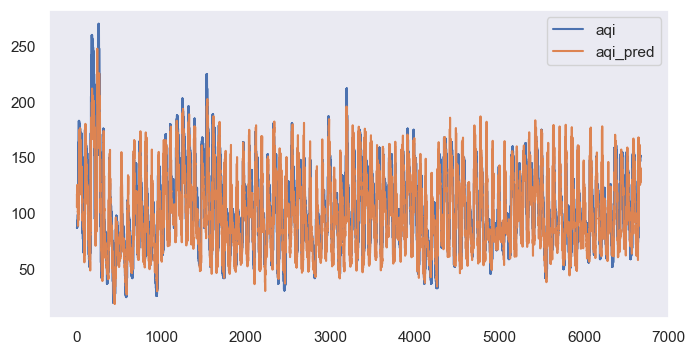

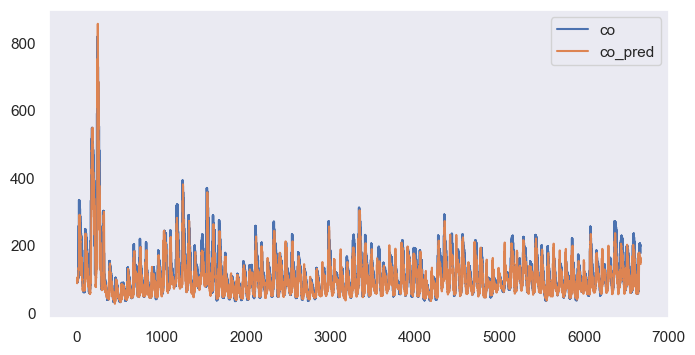

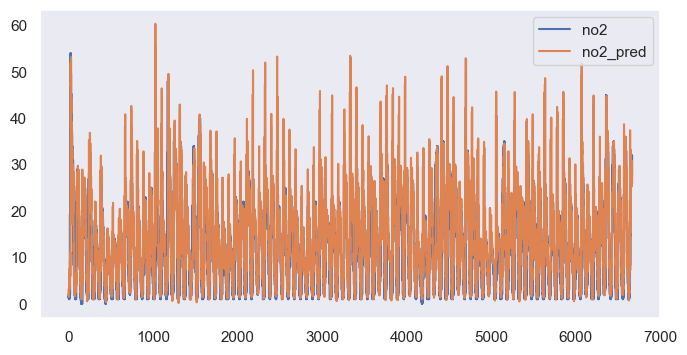

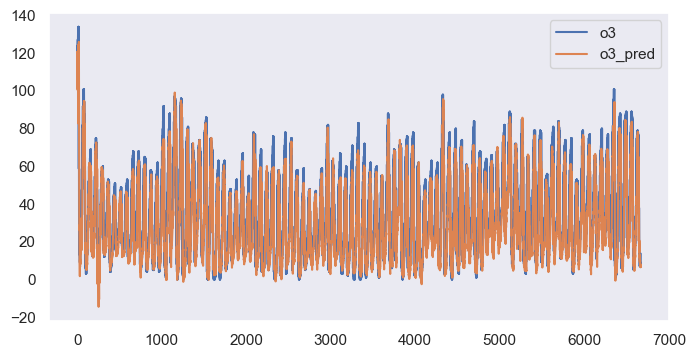

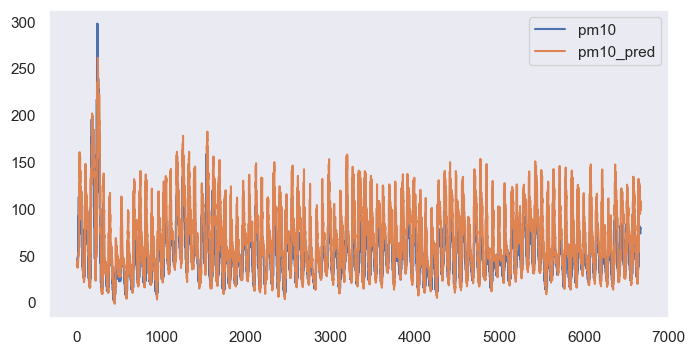

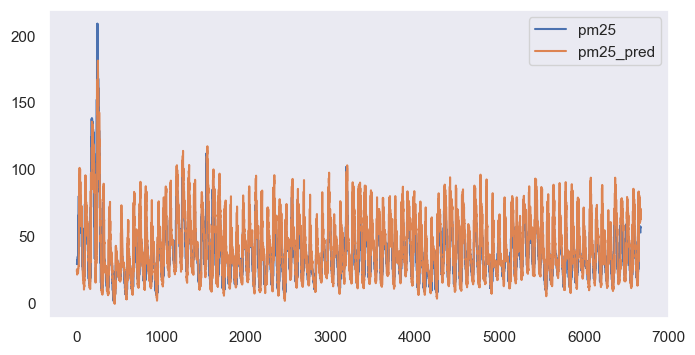

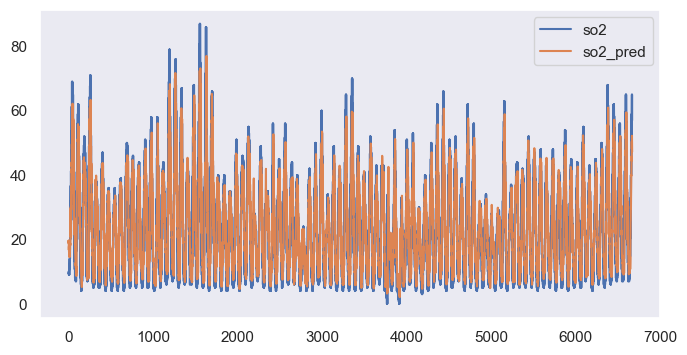

In [89]:
mpl.rcParams['figure.figsize'] = (8,4)
mpl.rcParams['axes.grid'] = False
df_final[['aqi', 'aqi_pred']].plot()
df_final[['co', 'co_pred']].plot()
df_final[['no2', 'no2_pred']].plot()
df_final[['o3', 'o3_pred']].plot()
df_final[['pm10', 'pm10_pred']].plot()
df_final[['pm25', 'pm25_pred']].plot()
df_final[['so2', 'so2_pred']].plot()

# Save Model

In [90]:
model.save("../model/model.h5")

c:\Users\62877\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
